<a href="https://colab.research.google.com/github/01DaisyLynn/HYPOTHYROID-PREDICTION/blob/main/DECISION_TREES_SVM_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HYPOTHYROIDISM TEST RESULTS DATASET** 

## Defining the question

### a) ***Data Analytic question***

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) ***Metric of success***

 Analysis will be considered a success if it achieves an accuracy of 90% - 99%. The higher the accuracy the better the model

### c) ***Context***

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare

Hypothyroidism -is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones

Thyroid gland is a vital hormone gland that plays a major role in the metabolism, growth and development of the human body

Hyperthyroidism is the production of too much thyroxine hormone

### d) ***Expremimental Design***

1.  Review dataset
2.  perform Data cleaning
3.  Perform EDA
4.  Create advanced decision tree models(Random Forest, Adaboost)
5.  Create SVM model



### Explaining columns

Lithium - drug used to increases thyroid autoimmunity if present before therapy (in dataset means if patient received drug)

Goitre - occur in a gland that is producing too much hormone(does patient have or not)

TSH stands for thyroid stimulating hormone. A TSH test is a blood test that measures this hormone

T3_Measured - This test measures the level of triiodothyronine (T3) in your blood. T3 is one hormones made by your thyroid

T4 thyroxine hormone, which is produced by the thyroid gland 

TBG(thyroxine binding globulin)- blood test measures the level of a protein that moves thyroid hormone throughout your body

## Reviewing Dataset

*importing libraries*

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#loading dataset
data= pd.read_csv('/content/hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In above dataset columns with y = "yes" and n="no" while f="false" and t="true"

In [4]:
#getting the shape of our dataset
data.shape

#the dataset has 3163 rows and 26 columns

(3163, 26)

In [5]:
#checking if the data types 
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [6]:
#statistical description of our numerical variables
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [7]:
# Checking columns
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
#checking for unique values
data['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [9]:
#checking for unique values
data['T4U_measured'].unique()

array(['y', 'n'], dtype=object)

In [10]:
#checking for unique values
data['sex'].unique()

array(['M', 'F', '?'], dtype=object)

In [11]:
#Checking for any duplicates
data.duplicated().any()

True

In [12]:
#Checking for sum of duplicates
data.duplicated().sum()

77

There is presence of duplicates i.e 77 duplicated rows

In [13]:
#Checking for missing values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Data cleaning

In [14]:
#Dropping the duplicated columns
data.drop_duplicates(keep='first', inplace = True)

In [15]:
#Checking if the duplicates have been dropped
data.duplicated().sum()

0

duplicated columns have been dropped since its repetition of same data

In [16]:
#replacing ? with nan
data.replace('?',np.nan,inplace=True)
data.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN


In [17]:
#checking for null values since ? was replaced with nan(null)
data.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Presence of missing values

In [18]:
#Changing data type of our numerical variables to float
data[['age','TSH','T3','TT4','T4U','FTI','TBG']] = data[['age','TSH','T3','TT4','T4U','FTI','TBG']].astype('float')

In [19]:
data.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [20]:
#filling missing values with 0
data.fillna(0.0, inplace=True)
data.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,0.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,0.0
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,0.0


Missing values were replaced with 0 since the data is sensitive and provides critical information,we can't assume e.g what were the results a test because each result will affect prediction of whether patient has hypothyroid(to avoid false prediction)

In [21]:
#checking if missing values were replaced
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

No presence of missing values

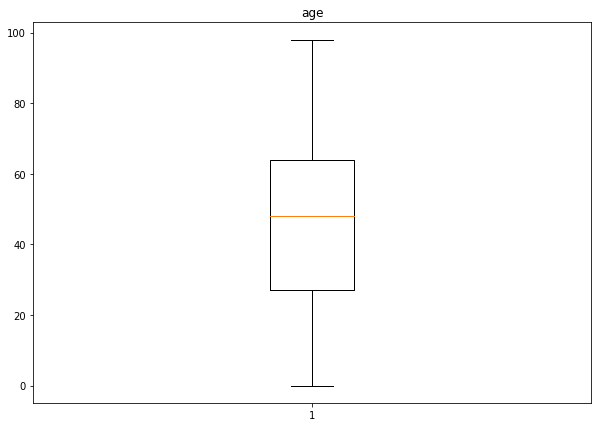

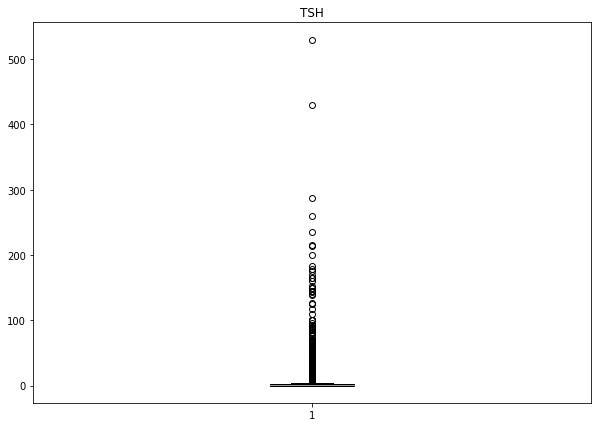

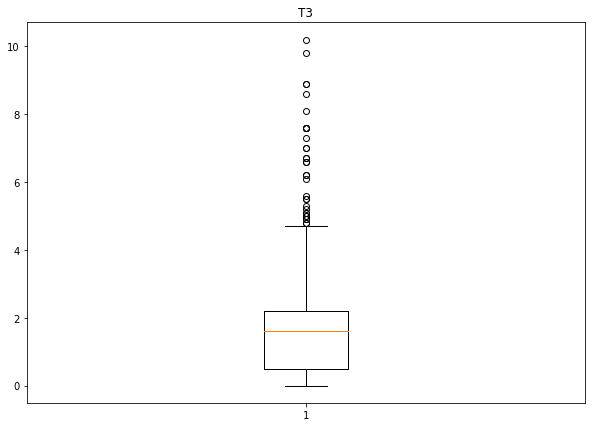

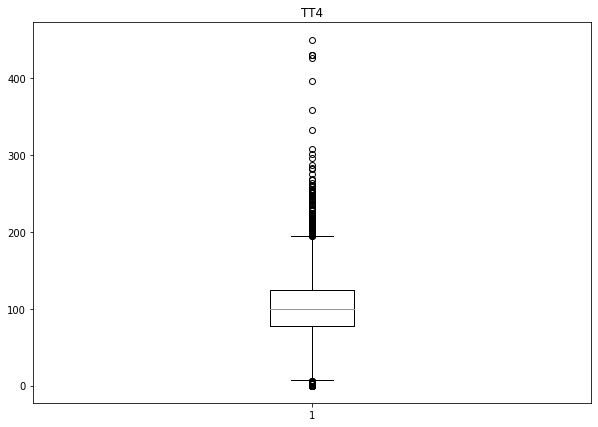

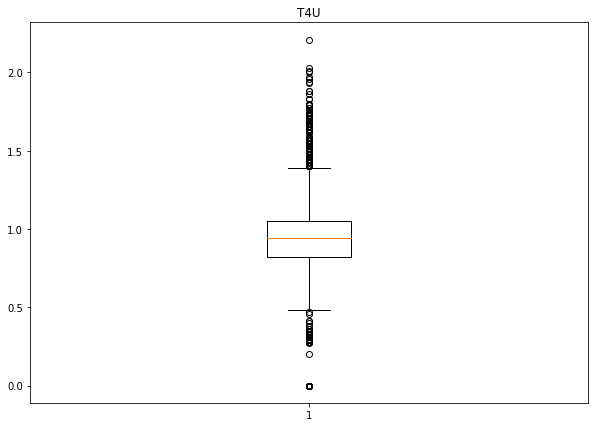

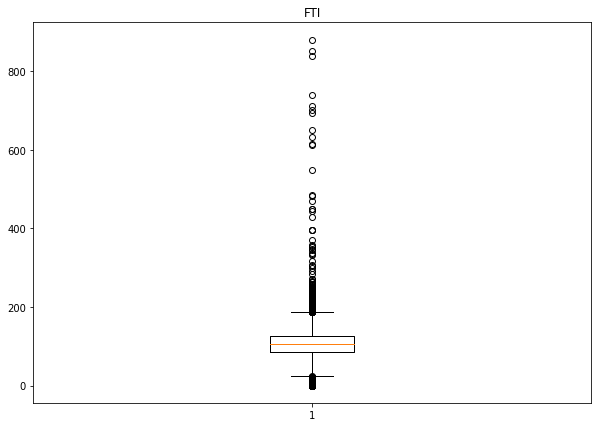

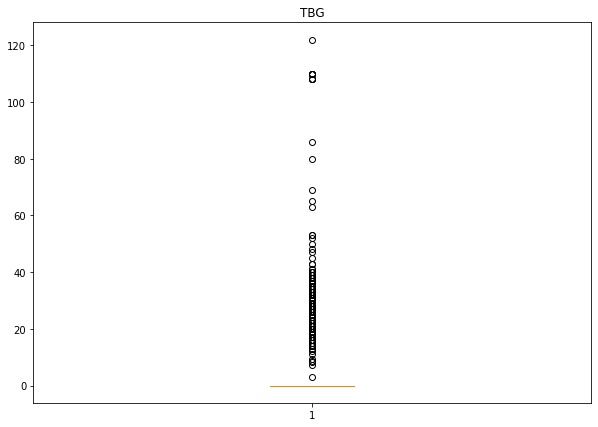

In [22]:
#Checking for outliers
col=['age','TSH','T3','TT4','T4U','FTI','TBG']
for i in col:
  fig=plt.figure(figsize = (10,7))
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

There is presence of outliers

## Exploratory Data Analysis

### ***Univariate Analysis***

In [23]:
#frequency table for age variable
data.age.value_counts()

0.0     438
59.0     63
62.0     61
60.0     60
72.0     59
       ... 
98.0      1
97.0      1
5.0       1
90.0      1
93.0      1
Name: age, Length: 93, dtype: int64

Patients of age 59 have most records after those whose age isn't known

In [24]:
#frequency table for thyroid_surgery
data.thyroid_surgery.value_counts()

f    2983
t     103
Name: thyroid_surgery, dtype: int64

Most of the patients haven't had thyroid surgery before

In [25]:
# Finding the measures of central tendencies in the numerical columns

numerical_columns =['age','TSH','T3','TT4','T4U','FTI','TBG']

for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(data[column].mean()))
  print(column + ', Mode: '+ str(data[column].mode()))
  print(column + ', Median: '+ str(data[column].median()))
  print(column + ', Standard deviation: '+ str(data[column].std()))
  print(column + ', Variance: '+ str(data[column].var()))
  print(column + ', Skewness: '+ str(data[column].skew()))
  print(column + ', Kurtosis: '+ str(data[column].kurt()))



age, Mean: 43.85806869734284
age, Mode: 0    0.0
dtype: float64
age, Median: 48.0
age, Standard deviation: 25.239866038279377
age, Variance: 637.0508376302887
age, Skewness: -0.35812334876853147
age, Kurtosis: -0.9299783829997312


TSH, Mean: 4.952793259883344
TSH, Mode: 0    0.0
dtype: float64
TSH, Median: 0.4
TSH, Standard deviation: 22.276446817821206
TSH, Variance: 496.24008282721655
TSH, Skewness: 11.115661996068875
TSH, Kurtosis: 179.28817042658284


T3, Mean: 1.5075826312378469
T3, Mode: 0    0.0
dtype: float64
T3, Median: 1.6
T3, Standard deviation: 1.179189838963223
T3, Variance: 1.3904886763141115
T3, Skewness: 1.1273329291390457
T3, Kurtosis: 4.600644022144946


TT4, Mean: 100.25272197018795
TT4, Mode: 0    0.0
dtype: float64
TT4, Median: 100.0
TT4, Standard deviation: 51.7957002531258
TT4, Variance: 2682.794564711656
TT4, Skewness: 0.6392402012282863
TT4, Kurtosis: 3.76395648227627


T4U, Mean: 0.901850291639662
T4U, Mode: 0    0.0
dtype: float64
T4U, Median: 0.94
T4U, St

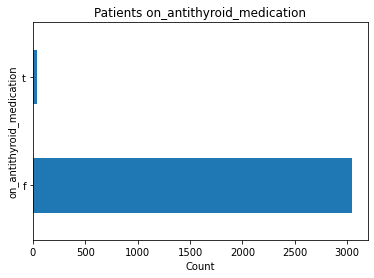

In [26]:
#Bargraph showcasing if Patients is on_antithyroid_medication
data['on_antithyroid_medication'].value_counts().head().plot(kind= 'barh');

plt.xlabel("Count")
plt.ylabel("on_antithyroid_medication")

# Giving a title to our Bar chart
plt.title("Patients on_antithyroid_medication");

from above graph we can see that most of the patients don't take antithyroid_medication

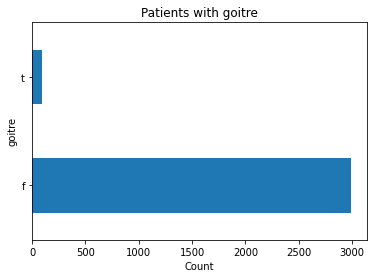

In [27]:
#Bargraph showcasing if Patients with goitre
data['goitre'].value_counts().head().plot(kind= 'barh');

plt.xlabel("Count")
plt.ylabel("goitre")

# Giving a title to our Bar chart
plt.title("Patients with goitre");

from above graph we can see that most of the patients don't have goitre

### ***Bivariate analysis***

In [28]:
#convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

#data = data.apply(lambda sex: en.fit_transform(sex.astype(str)), axis=0, result_type='expand')
data['status'] = en.fit_transform(data['status'])
data['sex'] = en.fit_transform(data['sex'].astype(str))
data['on_thyroxine'] = en.fit_transform(data['on_thyroxine'])
data['query_on_thyroxine'] = en.fit_transform(data['query_on_thyroxine'])
data['on_antithyroid_medication'] = en.fit_transform(data['on_antithyroid_medication'])
data['thyroid_surgery'] = en.fit_transform(data['thyroid_surgery'])
data['query_hypothyroid'] = en.fit_transform(data['query_hypothyroid'])
data['query_hyperthyroid'] = en.fit_transform(data['query_hyperthyroid'])
data['pregnant'] = en.fit_transform(data['pregnant'])
data['sick'] = en.fit_transform(data['sick'])
data['tumor'] = en.fit_transform(data['tumor'])
data['lithium'] = en.fit_transform(data['lithium'])
data['goitre'] = en.fit_transform(data['goitre'])
data['TSH_measured'] = en.fit_transform(data['TSH_measured'])
data['T3_measured'] = en.fit_transform(data['T3_measured'])
data['TT4_measured'] = en.fit_transform(data['TT4_measured'])
data['T4U_measured'] = en.fit_transform(data['T4U_measured'])
data['FTI_measured'] = en.fit_transform(data['FTI_measured'])
data['TBG_measured'] = en.fit_transform(data['TBG_measured'])
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,58.0,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,0.0
3159,1,29.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,0.0
3160,1,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,0.0
3161,1,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,0.0


In status hypothyroid = 0 negative = 1 

In sex column, male = 2 and female = 1

In columns with f(false) = 0 and t(true) = 1

In columns with y(yes) = 1 and n(no) = 0

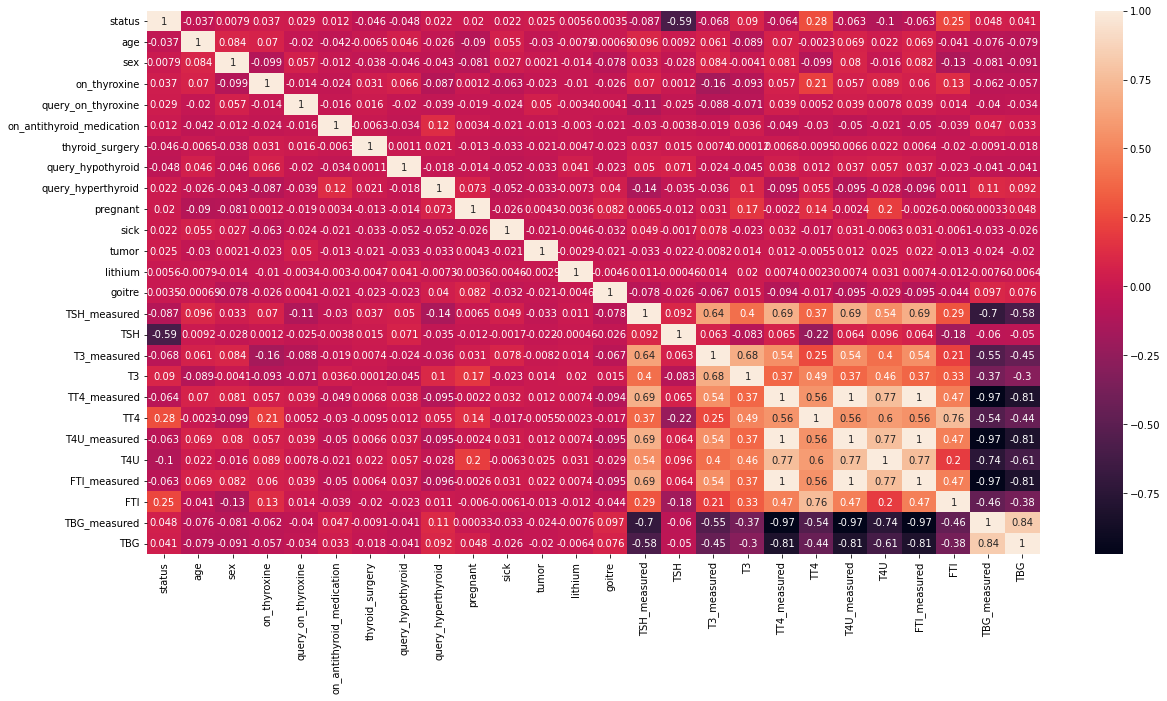

In [29]:
#Checking the correlation using a heatmap

fig,ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(),annot=True)
plt.show()

postive correlation means if one increases the other also increases e.g TT4_measured and T4U_measured have a strong correlation of 1

negative correlation means if one increases the other decreases e.g TBG_measured and FTI_measured have weak correlation of -0.97

## Random Forest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [31]:
#splitting the dependant and independent variables
X = data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4']].values
y = data['status'].values

In [45]:
# Split the dataset into train and test sets
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [65]:
#creating our random forest
forest = RandomForestRegressor(n_estimators = 200, random_state=42, min_samples_split = 20, max_depth=8)
forest = forest.fit(X_train, y_train)

In [66]:
# Prediction based on the model we've trained
y_pred = forest.predict(X_test)

difference = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

difference.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.957530
std,0.197179,0.175576
min,0.000000,0.001740
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


There isn't much of a difference between our actual and predicted values

In [77]:
from sklearn.metrics import accuracy_score
print('accuracy is', metrics.accuracy_score(y_test, y_pred))

*accuracy is* :  0.9851576994434137

accuracy of 98% is really good

In [60]:
features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4']
features

labels=data['status'].astype(str)
labels
label=labels.unique()
label

array(['0', '1'], dtype=object)

Text(0.5, 1.0, 'Feature importance')

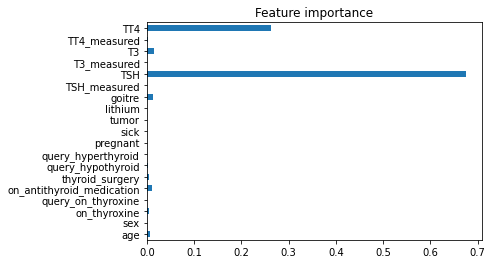

In [68]:
#finding most important features
feature_importance=pd.Series(forest.feature_importances_,index=features)
feature_importance.plot(kind='barh')
plt.title('Feature importance')

From the above graph we can see that TSH and TT4 are the most important features for our prediction, followed by T3 and goitre

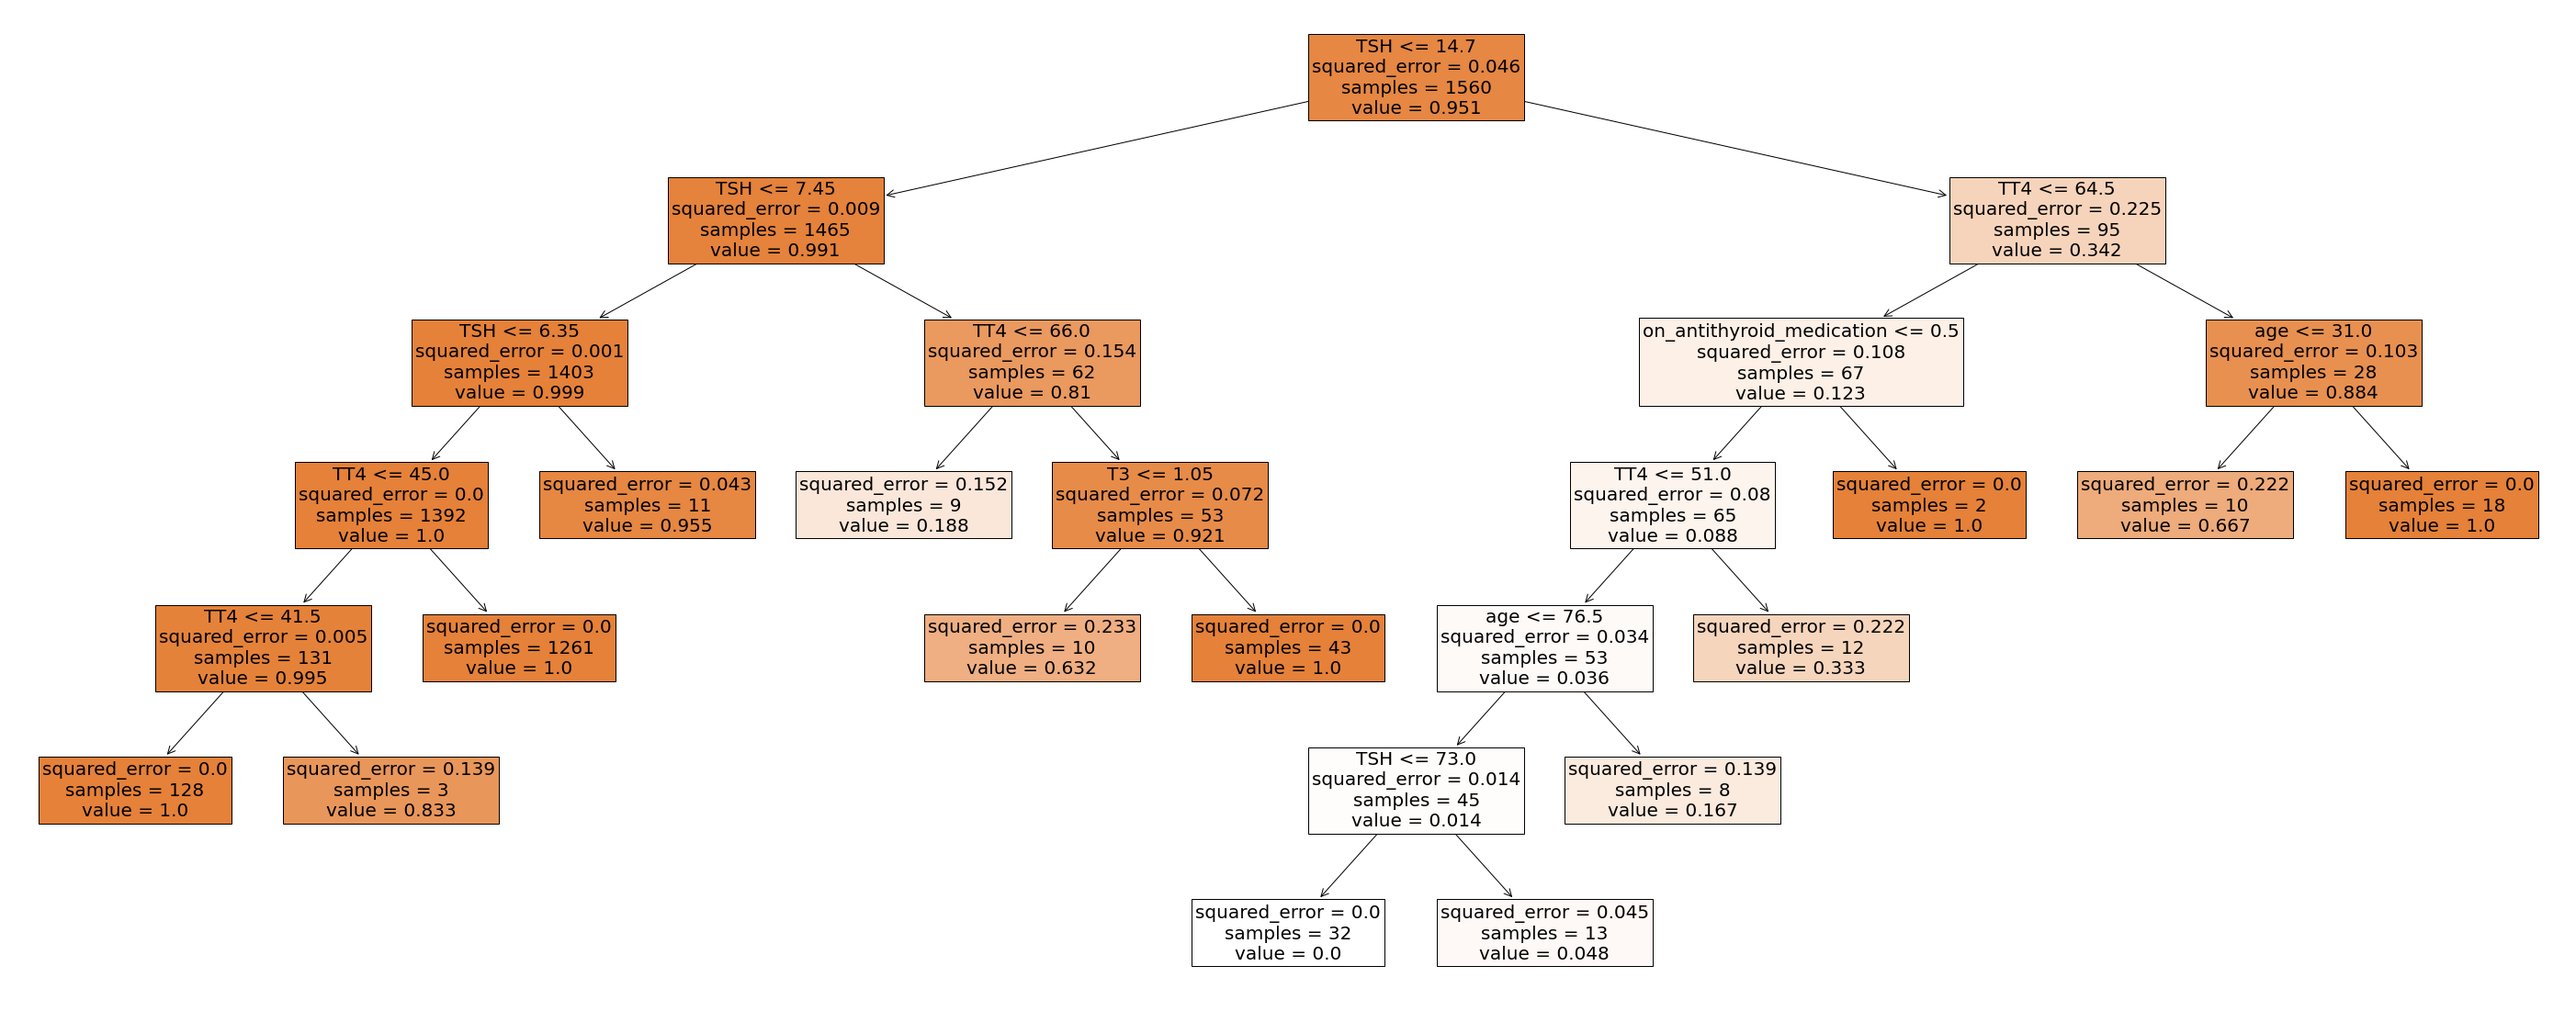

In [73]:
from sklearn import metrics
from sklearn import tree
import graphviz

treee = forest.estimators_[199]

fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(treee, fontsize=20, filled=True, feature_names=features, class_names=label)
plt.show()

## Adaboost

In [63]:
X = data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4']].values
y = data[['status']].values

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

#creating model
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=200, random_state=42)

#fitting model
ada_boost = ada_boost.fit(X_train, y_train)

#making prediction
model = ada_boost.predict(X)

In [ ]:
#printing accuracy
print('Accuracy of Adaboost is : ', metrics.accuracy_score(y_test, model))

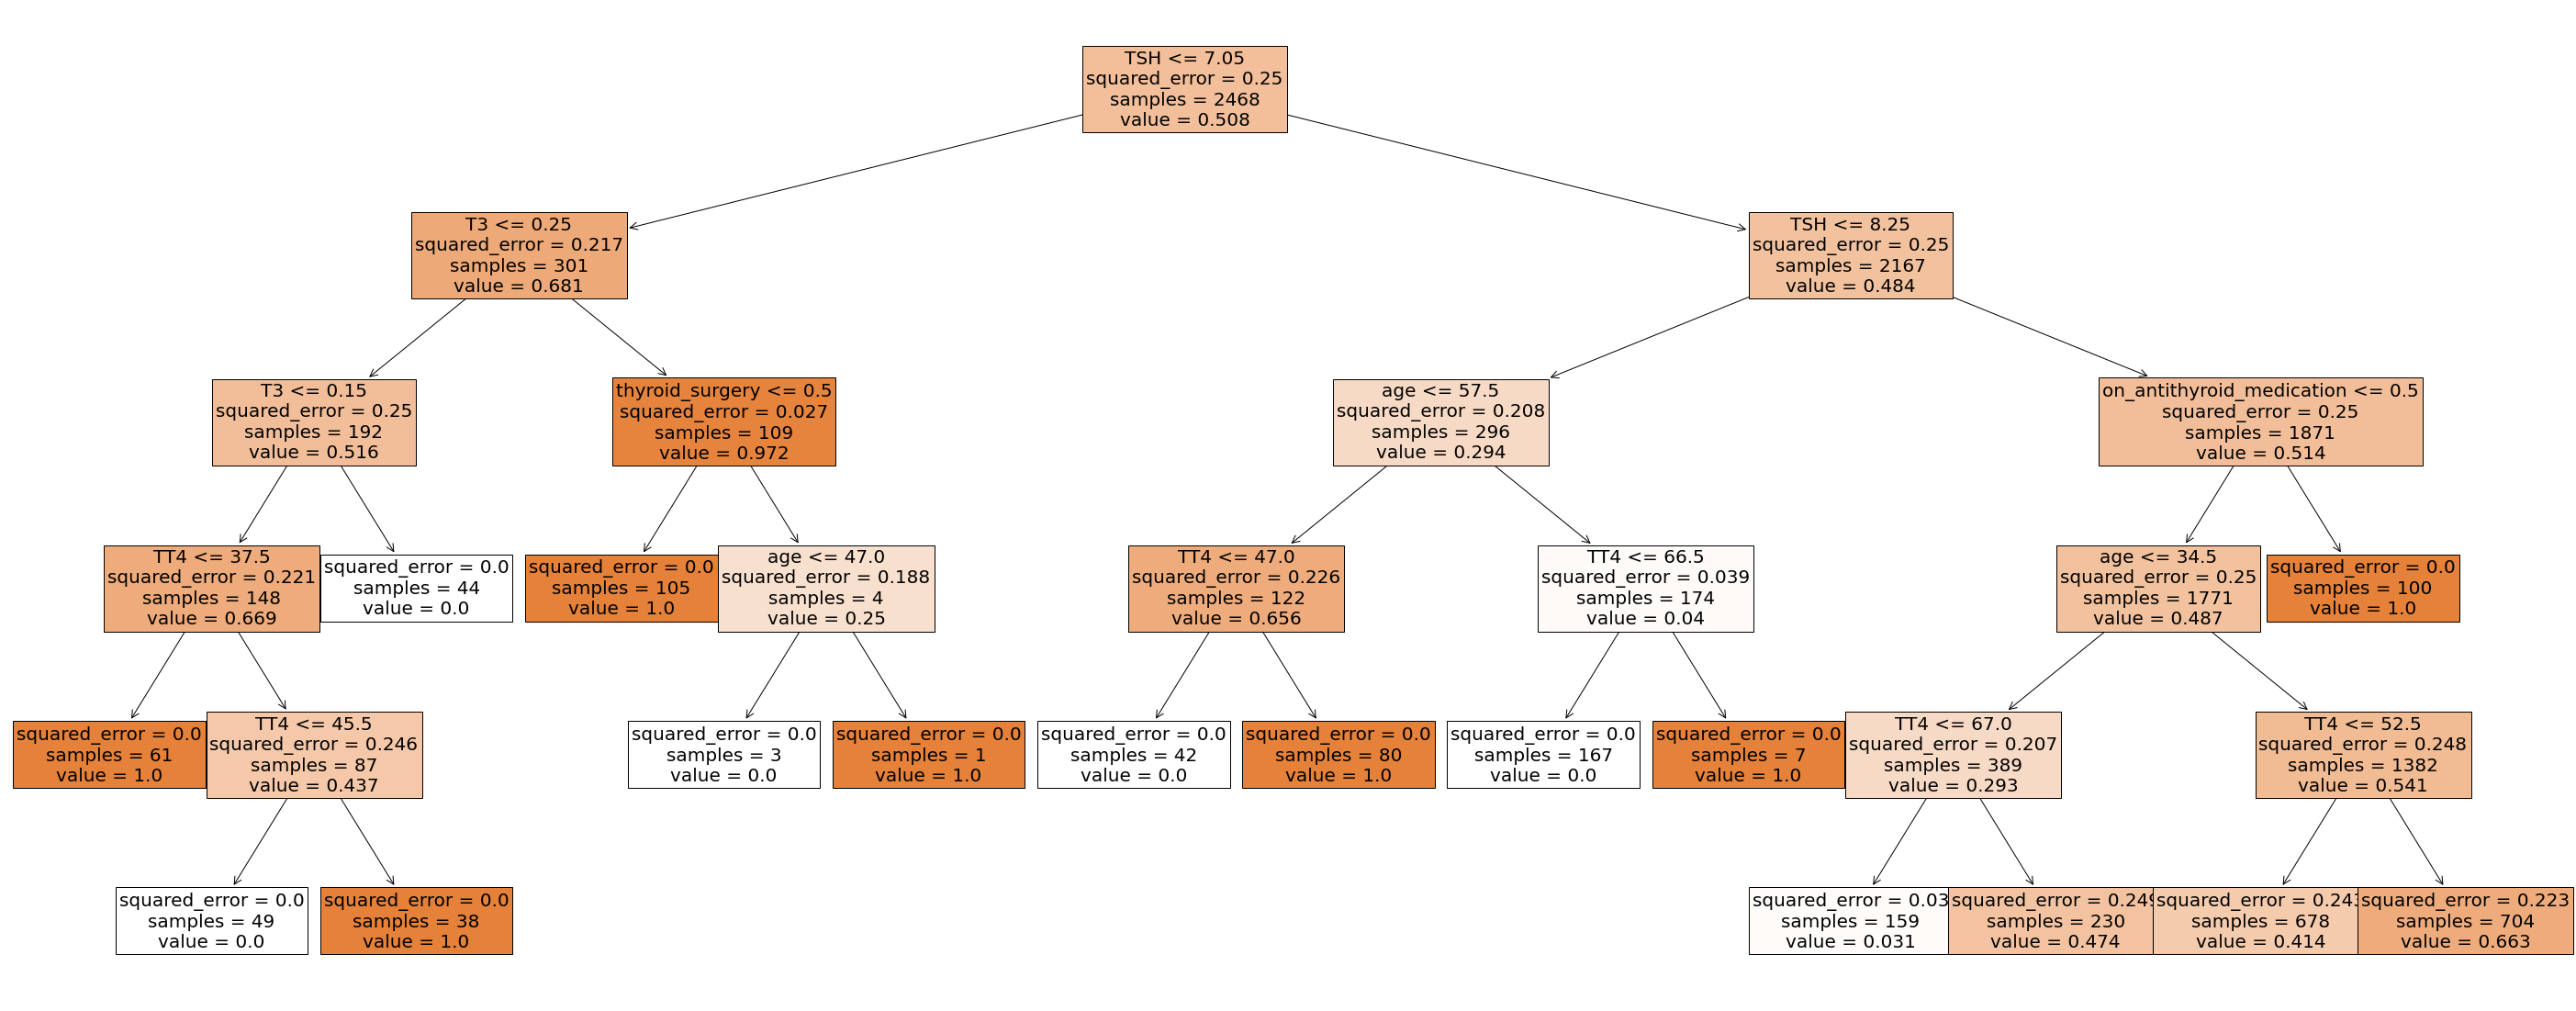

In [119]:
from sklearn import metrics
from sklearn import tree
import graphviz

tree1 = ada_boost.estimators_[199]

fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(tree1, fontsize=20, filled=True, feature_names=features, class_names=label)
plt.show()

In above diagram we can see that TSH is a very important feature

## Support Vector Machine

In [87]:
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [80]:
# will we use most important features given by our decision trees i.e TSH and TT4

X2 = data[['TSH', 'TT4']].values

y = data['status'].values

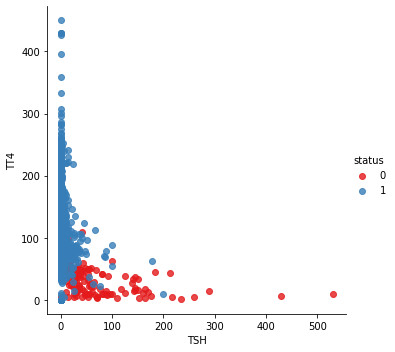

In [85]:
# Plotting our features

sns.lmplot(x='TSH', y='TT4', data=data, hue='status', palette='Set1', fit_reg=False);

0(Red) represents the infected patients while 1(blue) represents uninfected

In [86]:
# Split the dataset into train and test sets
X2_train,X2_test, y2_train,y2_test= train_test_split(X2,y, test_size = 0.2, random_state=0)

### Linear

In [88]:
#fitting model
svm_lin = SVC(kernel='linear')

svm_lin.fit(X2_train, y2_train)

#making prediction
y_pred_linear = svm_lin.predict(X2_test)


In [89]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y2_test, y_pred_linear))

Accuracy is :  0.9789644012944984


Accuracy is 97%

### Polynomial

In [93]:
#fitting model
svm_poly = SVC(kernel='poly')

svm_poly.fit(X2_train, y2_train)

#predicting model
y_pred_poly= svm_poly.predict(X2_test)

In [94]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y2_test, y_pred_poly))

Accuracy is :  0.9644012944983819


Accuracy of 96.4%

### Rbf(radial basis function)

In [90]:
#fitting model
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X2_train, y2_train)

#predicting model
y_pred_rbf= svm_rbf.predict(X2_test)

In [91]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y2_test, y_pred_rbf))

Accuracy is :  0.9854368932038835


Accuracy of 98.5% is really good especially if compared to the rest

**Adding feature to SVM model**

In [96]:
#we're going to add our third most important feature T3

X3 = data[['TSH', 'TT4', 'T3']].values

y = data['status'].values

In [98]:
# Split the dataset into train and test sets
X3_train,X3_test, y3_train,y3_test= train_test_split(X3,y, test_size = 0.2, random_state=0)

### Linear 2

In [100]:
#fitting model
svm_lin = SVC(kernel='linear')

svm_lin.fit(X3_train, y3_train)

#making prediction
y_pred_linear = svm_lin.predict(X3_test)


In [102]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y3_test, y_pred_linear))

Accuracy is :  0.9805825242718447


Accuracy is 98% an improvement to our first linear svm of 97%

### Polynomial 2

In [103]:
#fitting model
svm_poly = SVC(kernel='poly')

svm_poly.fit(X3_train, y3_train)

#predicting model
y_pred_poly= svm_poly.predict(X3_test)

In [104]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y3_test, y_pred_poly))

Accuracy is :  0.9660194174757282


Accuracy of 96.6% which is a slight improvement to our first polynomial model of 96.4%

### Rbf 2

In [107]:
#fitting model
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X3_train, y3_train)

#predicting model
y_pred_rbf3= svm_rbf.predict(X3_test)

In [108]:
#getting our accuracy score
print('Accuracy is : ', metrics.accuracy_score(y3_test, y_pred_rbf3))

Accuracy is :  0.9854368932038835


Accuracy of 98.5% still the same with the first model but still performs best compared to other models

## Conclusions and recommendations

All our models perfdormed really well with over 95% accuracy

But RBF SVM kernel performed better than the rest of the models with a 98.5% accuracy 

It is therefore adviceable and recommended to use this model in the prediction of whether a patient has hypothyroid or not